#**PREDICTIVE MODELING FOR EMPLOYEE BURNOUT DETECTION**

# **1. Introduction**

## 1.1 Executive Summary

In today's fast-paced work environment, mental health issues and stress-related disorders are increasingly prominent. Statistics show that approximately 57.8 million adults in the US had Any Mental Illness (AMI) in 2021, affecting 22.8% of the adult population. Workplace stress's impact on mental health has risen, with 81% of employees reporting its effects in 2022, up from 78% in 2021. Additionally, 73% of employees note that workplace stress impacts their relationships. To address these challenges, our team developed a **predictive model for employee burnout detection**, integrating data from sources like the *Mental Health in Tech Survey, CDC Diabetes Health Indicators,* and *Sleep Health and Lifestyle Dataset*. Our analysis revealed insights such as stress decreasing with age, being higher in males, and correlating significantly with physical health and lifestyle choices. This model is a valuable tool for early burnout risk identification, promoting proactive interventions and fostering healthier work environments and individual well-being.

## 1.2 Project Objective and Motivation

 Our project aims to leverage data analytics to develop a predictive model for identifying the risk of employee burnout, addressing its escalating prevalence in modern workplaces. Through the analysis of extensive datasets encompassing mental health metrics, health indicators, and lifestyle patterns, our objective is to pinpoint critical stress factors causing the burnout.
 The motivation behind this endeavor originates from the urgent necessity to bridge the gap between siloed mental health research and actionable workplace solutions. Through the deployment of our predictive model, we hope to equip organizations with  tools to implement effective strategies that promote employee well-being and cultivate a resilient and thriving work environment.

## 1.3 Dataset Information
We used the following data sets to answer the questions that we decided to address for this assignment:
1. The “[Mental Health in Tech Survey](https://osmihelp.org/research.html)” - The OSMI Mental Health in Tech Survey gathers insights from professionals about their experiences with mental health challenges at work. The survey aims to increase awareness and drive changes in workplace policies to support mental wellness.
We used datasets from 2014 to 2023.
2. The “[CDC Diabetes Health Indicators](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)” - The CDC dataset by the UC Irvine Machine Learning Repository uses various health metrics indicators such as BMI, age, and mental health status from a broad demographic to predict diabetes among the population.
3. The “[Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)” - The dataset covers a wide range of variables related to sleep and employee conditions, such as gender, age, occupation, sleep duration, quality of sleep, and stress levels.

## 1.4 Report Summary
From the datasets, we have derived several main observations:

- Stress levels tend to decrease with increasing age and are higher in males compared to females.
- Consuming more fruits and vegetables while avoiding alcohol and smoking is associated with lower stress levels.
- Individuals who sleep more and are self-employed seem to experience lower levels of stress on average.
- Physical health and pre-existing conditions like difficulty walking and extremes in BMI (too low or too high) could lead to higher stress levels.
- Although stress levels vary across different occupations and locations, being self-employed and having a higher annual income is associated with lower employee stress.

Additionally, we used logistic regression to build and refine a predictive model classifying whether an employee is more likely to experience stress based on demographics, income, and pre-existing health conditions.

- Using binary classification and the SMOTE technique, we achieved a model accuracy of approximately 81.7%, with an F-1 score of 0.32.
- The logistic regression coefficients revealed that Education, Income, and General Health are the main factors that could influence stress levels.


---

#**2. Data Processing**


In [ ]:
#IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#MOUNT DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2.1 Importing required datasets

In [ ]:
#READ DATASETS

#OSMI Datasets
dosim_2016 = pd.read_csv("/content/drive/MyDrive/IS833_Team_2/data_sources/T6_OSMI_2016.csv")
dosim_2017 = pd.read_csv("/content/drive/MyDrive/IS833_Team_2/data_sources/T7_OSMI_2017.csv")
dosim_2018 = pd.read_csv("/content/drive/MyDrive/IS833_Team_2/data_sources/T8_OSMI_2018.csv")
dosim_2019 = pd.read_csv("/content/drive/MyDrive/IS833_Team_2/data_sources/T9_OSMI_2019.csv")
dosim_2020 = pd.read_csv("/content/drive/MyDrive/IS833_Team_2/data_sources/T10_OSMI_2020.csv")
dosim_2021 = pd.read_csv("/content/drive/MyDrive/IS833_Team_2/data_sources/T11_OSMI_2021.csv")
dosim_2022 = pd.read_csv("/content/drive/MyDrive/IS833_Team_2/data_sources/T12_OSMI_2022.csv")
dosim_2023 = pd.read_csv("/content/drive/MyDrive/IS833_Team_2/data_sources/T13_OSMI_2023.csv")

#Diabetes Datasets
ddiab = pd.read_csv("/content/drive/MyDrive/IS833_Team_2/data_sources/T2_diabetes_binary_health_indicators_BRFSS2015.csv")
ddiab5050 = pd.read_csv("/content/drive/MyDrive/IS833_Team_2/data_sources/T1_diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

#Sleep Health and Lifestyle Dataset
dsleep = pd.read_csv("/content/drive/MyDrive/IS833_Team_2/data_sources/T14_sleep_health_and_lifestyle_dataset.csv")



## 2.2 OSMI Mental Health in Tech Survey Datasets

#### **2.2.1 Raw Data**

In [ ]:
dosim_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [ ]:
dosim_2016.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [ ]:
#Concatinate datasets from 2017 to 2023
dosim_17to23 = [dosim_2017, dosim_2018, dosim_2019, dosim_2020, dosim_2021, dosim_2022, dosim_2023]
dosim_17to23_df = pd.concat(dosim_17to23)

In [ ]:
dosim_17to23_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2006 entries, 0 to 5
Columns: 153 entries, # to Tags
dtypes: float64(33), int64(2), object(118)
memory usage: 2.4+ MB


In [ ]:
dosim_17to23_df.head()

,#,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?,Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?,Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What country do you *live* in?,What US state or territory do you *live* in?,What country do you *work* in?,What US state or territory do you *work* in?,Have you been diagnosed with COVID-19?,Response Type,Tags
0,e49fe87572831232dcfa51b376b22039,0.0,100-500,1.0,1.0,No,Yes,No,I don't know,I don't know,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a1eede444ac024928d247a8372d54931,0.0,100-500,1.0,1.0,Yes,Yes,No,No,I don't know,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37d3fd67f62bd1e0a2dea4f9cd440d98,0.0,6-25,1.0,1.0,I don't know,No,I don't know,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,519b759442c1cab0e9b5a8a1acb1b216,0.0,More than 1000,1.0,1.0,Yes,Yes,I don't know,I don't know,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ef0af4927b575b1a3e607c11ca37870e,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **2.2.2 Clean Data**

We cleaned this dataset by consolidating surveys from the OSMI Mental Health in Tech Survey spanning from 2016 to 2023, extracting the essential variables required for our analyses.

Additionally, we standardized variations in column names across all datasets. Specifically, we:
* Created a new column and populated each row with pertinent data sourced from distinct columns: "US State or Territory," "Self-Employed?" and "Mental Health Disorder?"
* Extracted the relevant data from the OSMI 2016 survey and merged it with the data from 2017 to 2023.

In [ ]:
dosim_17to23_cleaned = dosim_17to23_df[["What US state or territory do you *work* in?",
                                        "What US state or territory do you <strong>work</strong> in?",
                                        "<strong>Are you self-employed?</strong>",
                                        "*Are you self-employed?*",
                                        "Do you currently have a mental health disorder?",
                                        "Do you *currently* have a mental health disorder?",
                                        "Overall, how much importance does your employer place on physical health?",
                                        "Overall, how much importance does your employer place on mental health?",
                                        "Does your employer offer resources to learn more about mental health disorders and options for seeking help?"]]

#Merging US State/Territory Columns
dosim_17to23_cleaned["US state or territory"] = dosim_17to23_cleaned["What US state or territory do you *work* in?"].fillna(dosim_17to23_cleaned["What US state or territory do you <strong>work</strong> in?"])
dosim_17to23_cleaned.drop(["What US state or territory do you *work* in?", "What US state or territory do you <strong>work</strong> in?"], axis=1, inplace=True)

#Merging Self-Employed
dosim_17to23_cleaned["Self-employed?"] = dosim_17to23_cleaned["<strong>Are you self-employed?</strong>"].fillna(dosim_17to23_cleaned["*Are you self-employed?*"])
dosim_17to23_cleaned.drop(["<strong>Are you self-employed?</strong>", "*Are you self-employed?*"], axis=1, inplace=True)

#Merging Do you currently have a mental health disorder? Column
dosim_17to23_cleaned["Mental Health Disorder?"] = dosim_17to23_cleaned["Do you currently have a mental health disorder?"].fillna(dosim_17to23_cleaned["Do you *currently* have a mental health disorder?"])
dosim_17to23_cleaned.drop(["Do you currently have a mental health disorder?", "Do you *currently* have a mental health disorder?"], axis=1, inplace=True)

#Cleaning 2016 dataframe
dosim_2016_cleaned = dosim_2016[["Are you self-employed?","Do you currently have a mental health disorder?", "What US state or territory do you work in?"]]
dosim_2016_cleaned.rename({"Are you self-employed?": "Self-employed?",
                            "Do you currently have a mental health disorder?": "Mental Health Disorder?",
                            "What US state or territory do you work in?": "US state or territory"}, axis=1, inplace=True)

#Merging 2016 dataframe with dosim_17to23_cleaned
merge_df1 = [dosim_17to23_cleaned, dosim_2016_cleaned]
df1 = pd.concat(merge_df1)
df1['Mental Health Disorder?'].replace('Maybe', 'Possibly', inplace=True)

df1

<ipython-input-9-db699834f7a3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dosim_17to23_cleaned["US state or territory"] = dosim_17to23_cleaned["What US state or territory do you *work* in?"].fillna(dosim_17to23_cleaned["What US state or territory do you <strong>work</strong> in?"])
<ipython-input-9-db699834f7a3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dosim_17to23_cleaned.drop(["What US state or territory do you *work* in?", "What US state or territory do you <strong>work</strong> in?"], axis=1, inplace=True)
<ipython-input-9-db699834f7a3>:16: Se

,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,US state or territory,Self-employed?,Mental Health Disorder?
0,6.0,0.0,I don't know,NaN,0.0,Possibly
1,7.0,2.0,No,NaN,0.0,Possibly
2,0.0,1.0,No,Missouri,0.0,Yes
3,7.0,5.0,I don't know,Washington,0.0,Yes
4,NaN,NaN,NaN,Illinois,1.0,No
...,...,...,...,...,...,...
1428,NaN,NaN,NaN,New York,1,No
1429,NaN,NaN,NaN,NaN,1,No
1430,NaN,NaN,NaN,Georgia,0,Possibly
1431,NaN,NaN,NaN,Nebraska,0,Yes


### **2.2.3 Feature Definition**

* *Overall, how much importance does your employer place on physical health?:* Scale from 1-10
* *Overall, how much importance does your employer place on mental health?:* Scale from 1-10
* *Does your employer offer resources to learn more about mental health disorders and options for seeking help?:* Categorical - I don't know, Yes, No
* *US state or territory:* US State (Fill in the blanks)
* *Self-employed?:* 0 - No, 1 - yes
* *Mental Health Disorder?:* Categorical - Possibly, Yes, No, I don't know

## 2.3 Diabetes Datasets

#### 2.3.1 Raw Data

In [ ]:
ddiab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
ddiab.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
ddiab5050.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
ddiab5050.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


###**2.3.2 Clean Data**

* We corrected the Gender records, as in the raw data, 0.0 represents Female, and Gender = 1.0 represents Male.
* We also rescaled the Mental Health Level scale from 0-30 in the raw data to 0-100.

In [ ]:
#Concatenating both datasets
ddiab_t1t2= [ddiab, ddiab5050]
ddiab_t1t2_df = pd.concat(ddiab_t1t2)

#Renaming and grabbing columns needed from ddiab_t1t2_df
ddiab_t1t2_df_cleaned = ddiab_t1t2_df
ddiab_t1t2_df_cleaned.rename({"Sex": "Gender"}, axis=1, inplace=True)
ddiab_t1t2_df_cleaned["Gender"].replace(0.0, "Female", inplace=True)
ddiab_t1t2_df_cleaned["Gender"].replace(1.0, "Male", inplace=True)

ddiab_t1t2_df_cleaned.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,Female,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,Female,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,Female,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,Female,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,Female,11.0,5.0,4.0


**Mental Health / Stress Classification**
We created the following two  groups out of data associated with 'MentHlth' since our final target variable is a logistic regression model:

**1. Are they stressed?**
* 0 <= days < 15: 0 (No)
* 15 <= days < 30: 1 (Yes)

**2. Levels of Stress**
* 0 <= days < 11: Low
* 11 <= days < 21: Medium
* 21 <= days < 30: High

The reasons behind this could be its alignment with our business goal (will this employee experience stress while working?), or it can also reduce some noise by creating groups.
In this process, we also realized that this data set is highly imbalanced and needs to be addressed to increase accuracy in the predictive model.

In [ ]:
ddiab_t1t2_df_cleaned['Stress_Level'] = np.where(ddiab_t1t2_df_cleaned['MentHlth']>21, 'High', np.where(ddiab_t1t2_df_cleaned['MentHlth']<11, 'Low', 'Medium'))
ddiab_t1t2_df_cleaned['Stress_Level_2'] = np.where(ddiab_t1t2_df_cleaned['MentHlth'] > 15, "High", "Low")
ddiab_t1t2_df_cleaned.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income,Stress_Level,Stress_Level_2
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,5.0,18.0,15.0,1.0,Female,9.0,4.0,3.0,Medium,High
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,Female,7.0,6.0,1.0,Low,Low
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,5.0,30.0,30.0,1.0,Female,9.0,4.0,8.0,High,High
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,Female,11.0,3.0,6.0,Low,Low
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,2.0,3.0,0.0,0.0,Female,11.0,5.0,4.0,Low,Low


**BMI Classification**

* *Underweight*: BMI less than 18.5
* *Normal weight*: BMI between 18.5 and 24.9
* *Overweight*: BMI between 25 and 29.9
* *Obesity*: BMI 30 or greater

In [ ]:
# Define the bin edges and labels
bin_edges = [-np.inf, 18.5, 25, 30, np.inf]
bin_labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obesity']

# Create a new column 'BMI_Category' based on binning of 'BMI'
ddiab_t1t2_df_cleaned['BMI_Category'] = pd.cut(ddiab_t1t2_df_cleaned['BMI'], bins=bin_edges, labels=bin_labels, right=False)

ddiab_t1t2_df_cleaned['BMI_Category'].value_counts(normalize = True)

BMI_Category
Obesity          0.367772
Overweight       0.363422
Normal Weight    0.257152
Underweight      0.011653
Name: proportion, dtype: float64

**Physical Health Classification**

To convert physical health classification to binary, we categorized number of days in the past 30 days during which the patient's physical health was not good > 10 as unhealthy.

In [ ]:
PhysHlth_threshold = 10
ddiab_t1t2_df_cleaned['PhysHlth'] = (ddiab_t1t2_df_cleaned['PhysHlth'] > PhysHlth_threshold).astype(float)
ddiab_t1t2_df_cleaned.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income,Stress_Level,Stress_Level_2,BMI_Category
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,18.0,1.0,1.0,Female,9.0,4.0,3.0,Medium,High,Obesity
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,Female,7.0,6.0,1.0,Low,Low,Overweight
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,30.0,1.0,1.0,Female,9.0,4.0,8.0,High,High,Overweight
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,Female,11.0,3.0,6.0,Low,Low,Overweight
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,3.0,0.0,0.0,Female,11.0,5.0,4.0,Low,Low,Normal Weight


In [ ]:
ddiab_t1t2_df_cleaned.to_csv('diabetes_data.csv')

### **2.3.3 Feature Definition**

* *Diabetes_binary:* Indicates whether the patient has diabetes or prediabetes (0 = no, 1 = yes)
* *HighBP:* Indicates whether the patient has high blood pressure (0 = no, 1 = yes)
* *HighChol:* Indicates whether the patient has high cholesterol (0 = no, 1 = yes)
* *CholCheck:* Indicates whether the patient had a cholesterol check in the last 5 years (0 = no, 1 = yes)
* *BMI:* Body Mass Index
* *Smoker*: Indicates whether the patient has smoked at least 100 cigarettes in their lifetime (0 = no, 1 = yes)
* *Stroke:* Indicates whether the patient has ever had a stroke (0 = no, 1 = yes)
* *HeartDiseaseorAttack:* Indicates whether the patient has had coronary heart disease or myocardial infarction (0 = no, 1 = yes)
* *PhysActivity:* Indicates whether the patient engaged in physical activity in the past 30 days, excluding job-related activity (0 = no, 1 = yes)
* *Fruits:* Indicates whether the patient consumes fruit one or more times per day (0 = no, 1 = yes)
* *Veggies:* Indicates whether the patient consumes vegetables one or more times per day (0 = no, 1 = yes)
* *HvyAlcoholConsump:* Indicates whether the patient is a heavy drinker (0 = no, 1 = yes)
* *AnyHealthcare:* Indicates whether the patient has any form of healthcare coverage (0 = no, 1 = yes)
* *NoDocbcCost:* Indicates whether the patient was unable to see a doctor in the past 12 months due to cost (0 = no, 1 = yes)
* *GenHlth:* General health rating on a scale of 1-5 (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor)
* *MentHlth:* Number of days in the past 30 days during which the patient's mental health was not good (scale: 1-30 days)
* *PhysHlth:* Number of days in the past 30 days during which the patient's physical health was not good (scale: 1-30 days)
* *DiffWalk:* Indicates whether the patient has serious difficulty walking or climbing stairs (0 = no, 1 = yes)
* *Sex:* Patient's sex (0 = female, 1 = male)
* *Age:* Patient's age category (1 = 18-24, 2 = 25-29, 3 = 30-34, 4 = 35-39, 5 = 40-44, 6 = 45-49, 7 = 50-54, 8 = 55-59, 9 = 60-64, 13 = 80 or older)
* *Education:* Patient's level of education (scale: 1-6, 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate))
* *Income:* Patient's income level (scale: 1-8, annual salary in USD,  1 = below 10,000, 2 = 10,000 - below 15,000, 3 = 15,000 - below 20,000, 4 = 20,000 - below 25,000, 5 = 25,000 - below 35,000, 6 = 35,000 - below 50,000, 7 = 50,000 - below 75,000, 8 = 75,000 or more)



##2.4 Sleep Health and Lifestyle Dataset

#### **2.4.1 Raw Data**

In [ ]:
dsleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
dsleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


#### **2.4.2 Clean Data**

In this dataset, we used the Sleep Health and Lifestyle Dataset to compare people's stress levels based on Gender and Age.

We reproportioned the Stress levels from 0-8 in the raw data to 0-100.


In [ ]:
dsleep_cleaned = dsleep
dsleep_cleaned["Sleep Disorder"].fillna("None", inplace=True)

dsleep_cleaned

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


#### **2.4.2 Feature Definition**

* *Person ID:* An identifier for each individual.

* *Gender:* The gender of the person (Male/Female).

* *Age:* The age of the person in years.

* *Occupation:* The occupation or profession of the person.

* *Sleep Duration (hours):* The number of hours the person sleeps per day.

* *Quality of Sleep (scale: 1-10):* A subjective rating of the quality of sleep, ranging from 1 to 10.

* *Physical Activity Level (minutes/day):* The number of minutes the person engages in physical activity daily.

* *Stress Level (scale: 1-10):* A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

* *BMI Category:* The BMI category of the person (e.g., Underweight, Normal, Overweight).

* *Blood Pressure (systolic/diastolic):* The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

* *Heart Rate (bpm):* The resting heart rate of the person in beats per minute.
Daily Steps: The number of steps the person takes per day.

* *Sleep Disorder:* The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).
---

# **3. Data Visualization and Analysis**

##3.1 What is the correlation of stress with people across various sex and age groups?

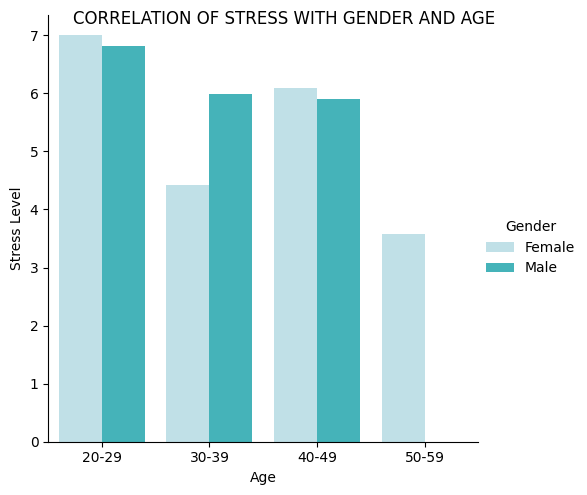

In [ ]:
# Create Age Group from "Age" variable
bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
dsleep_cleaned['AgeGroup'] = pd.cut(dsleep_cleaned['Age'], bins=bins, labels=labels)
dsleep_cleaned_group = dsleep_cleaned.groupby(['AgeGroup', 'Gender'])['Stress Level'].mean().reset_index()

# Create bar plots to see the relationship between Stress Level by Age & Gender
gender_palette = {"Male": "#32C5CC", "Female": "#BAE4ED"}
g = sns.catplot(x="AgeGroup", y="Stress Level", hue="Gender",
                data=dsleep_cleaned_group, kind="bar",
                palette=gender_palette, height=5, aspect=1)
g.fig.suptitle("CORRELATION OF STRESS WITH GENDER AND AGE")
g.set(xlabel="Age", ylabel="Stress Level")

plt.show()

**ANALYSIS** - Stress levels are higher among males compared to females, and they are most prevalent among younger individuals (aged 20-29).






## 3.2 What is the correlation of employee lifestyle with stress?

### 3.2.1 Correlation of stress and employee lifestyle

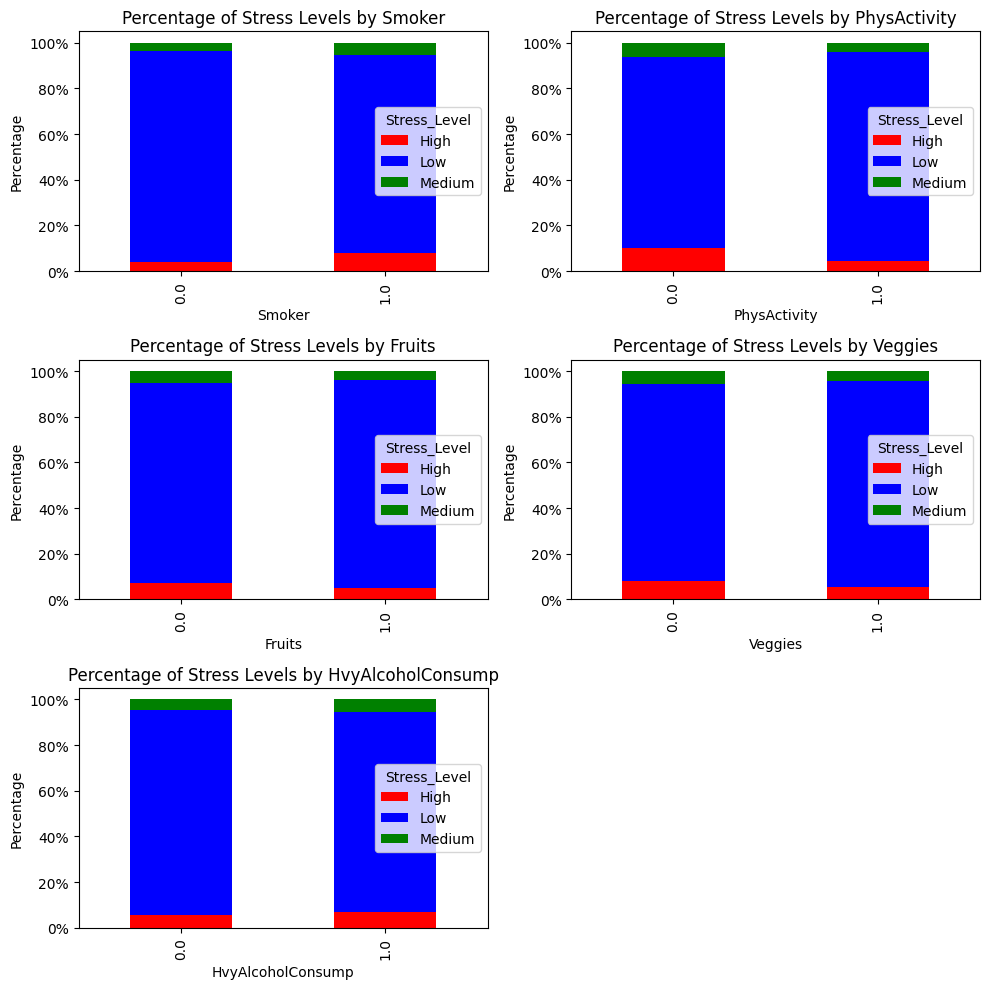

In [ ]:
# Set target x and y axis
cat_cols = ['Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
num_cols = ['MentHlth']

# Set the number of rows and columns for subplots
num_rows = 3
num_cols = 2

# Define colors for each stress level
stress_level_colors = {
    'Low': 'blue',
    'Medium': 'green',
    'High': 'red'
}

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

# Loop through each categorical column in cat_cols
for i, cat_col in enumerate(cat_cols):
    counts = ddiab_t1t2_df_cleaned.groupby(cat_col)['Stress_Level'].value_counts().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    percentages.plot(kind='bar', stacked=True, ax=axes[i], color=[stress_level_colors.get(x, 'blue') for x in percentages.columns])

# Set plot title and labels
    axes[i].set_title(f'Percentage of Stress Levels by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Percentage')
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Loop to stop creating grid
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

**ANALYSIS** - Among people who engaged in physical activity in the past 30 days and consume fruits and vegetables, there is a lower percentage of individuals with high stress levels. Meanwhile, there is a higher percentage of individuals with high stress levels among those who smoke or consume alcohol.

### 3.2.2 Correlation of stress based on employee's sleep

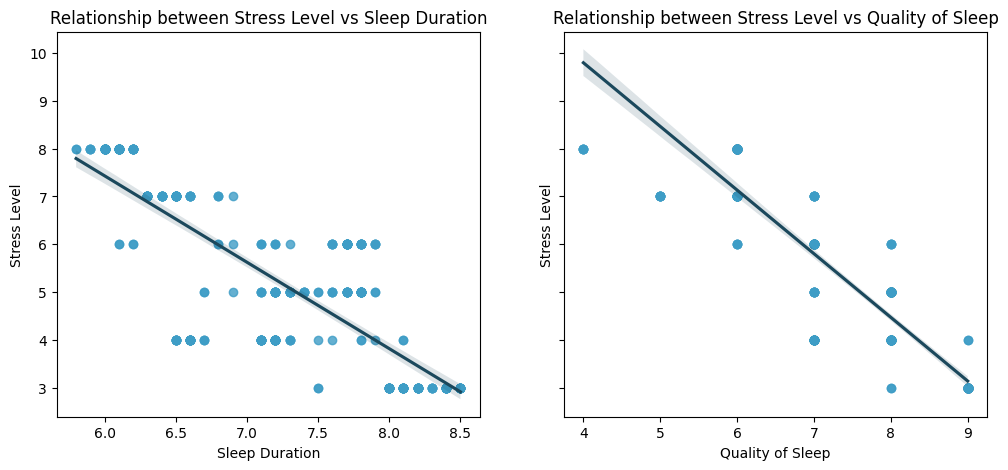

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def regplot(ax, feature):
    sns.regplot(x=dsleep_cleaned[feature], y=dsleep_cleaned["Stress Level"], scatter_kws={"color": "#3E9DC6"}, line_kws={"color": "#1B485C"}, ax=ax)
    ax.set_title("Relationship between Stress Level vs {}".format(feature))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
regplot(ax1, "Sleep Duration")
regplot(ax2, "Quality of Sleep")
plt.show()

**ANALYSIS** - Both graphs display a negative correlation between stress levels and sleep, indicating that higher sleep duration and better sleep quality are associated with lower stress levels.

The scatter plots suggest that as individuals get more or better quality sleep, their reported stress levels decrease.






### 3.2.3 Relationship between stress and sleep disorders

<ipython-input-50-df95817773b0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sleep Disorder", y="Stress Level", data=dsleep_cleaned, ax=ax, palette="viridis")


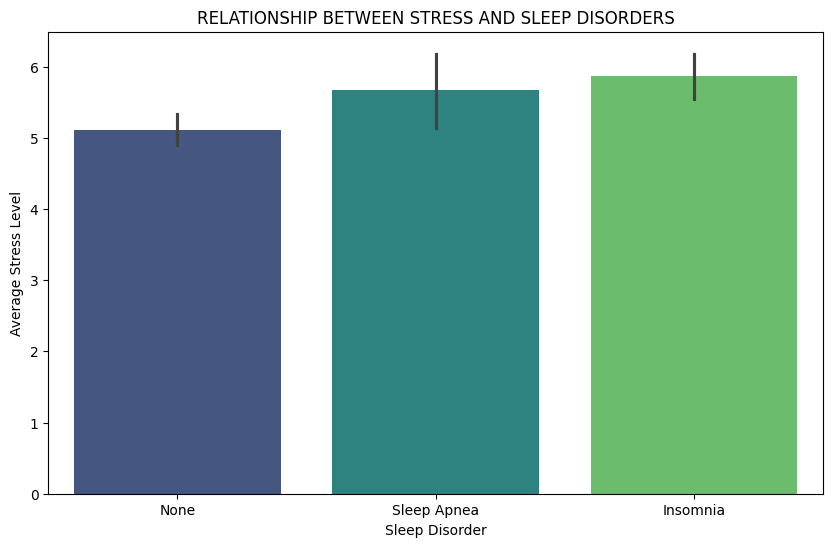

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="Sleep Disorder", y="Stress Level", data=dsleep_cleaned, ax=ax, palette="viridis")
ax.set_title("RELATIONSHIP BETWEEN STRESS AND SLEEP DISORDERS")
ax.set_xlabel("Sleep Disorder")
ax.set_ylabel("Average Stress Level")
plt.show()

**ANALYSIS** - The bar graph presents the average stress levels associated with different sleep disorders, showing that individuals with insomnia report the highest average stress level, followed by those with sleep apnea, and the lowest average stress level is observed in individuals without any sleep disorders.




### 3.2.4 Relationship between employee stress and income

**Income classification (annual salary in USD)**
* 1 = below 10,000

* 2 = 10,000 - below 15,000

* 3 = 15,000 - below 20,000

* 4 = 20,000 - below 25,000

* 5 = 25,000 - below 35,000

* 6 = 35,000 - below 50,000

* 7 = 50,000 - below 75,000

* 8 = 75,000 or more

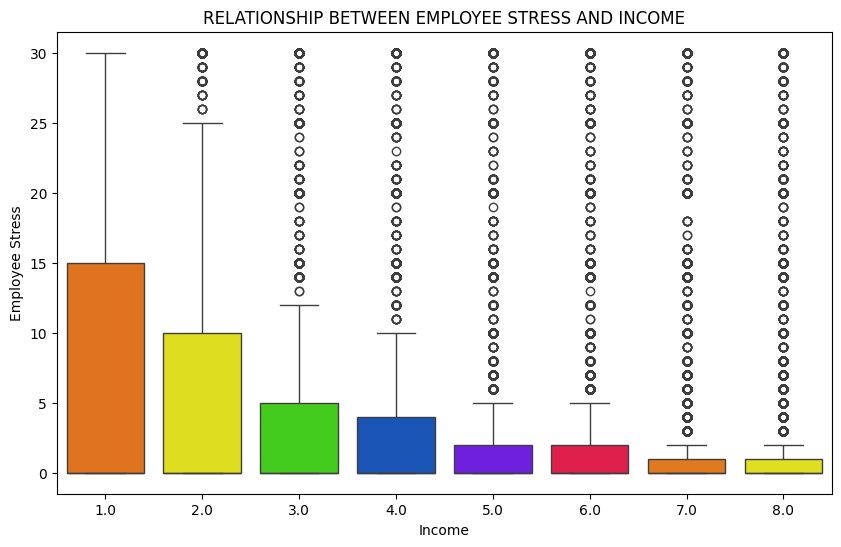

In [ ]:
income_stress = pd.DataFrame({
    x_label: grp['MentHlth']
    for x_label, grp in ddiab.groupby('Income')
})
plt.figure(figsize=(10, 6))
sns.boxplot(data=income_stress, palette='prism')
plt.xlabel('Income')
plt.ylabel('Employee Stress')
plt.title('RELATIONSHIP BETWEEN EMPLOYEE STRESS AND INCOME')
plt.show()

**ANALYSIS** -On average, employee stress tends to decrease with higher income. However, average stress levels are similar for individuals with annual income from $50K and higher (Income level 7 and 8).

## 3.3 How are employee health conditions related to stress?

### 3.3.1 Correlation of BMI with stress
**BMI Info**
  - Underweight: BMI less than 18.5
  - Normal weight: BMI between 18.5 and 24.9
  - Overweight: BMI between 25 and 29.9
  - Obesity: BMI 30 or greater

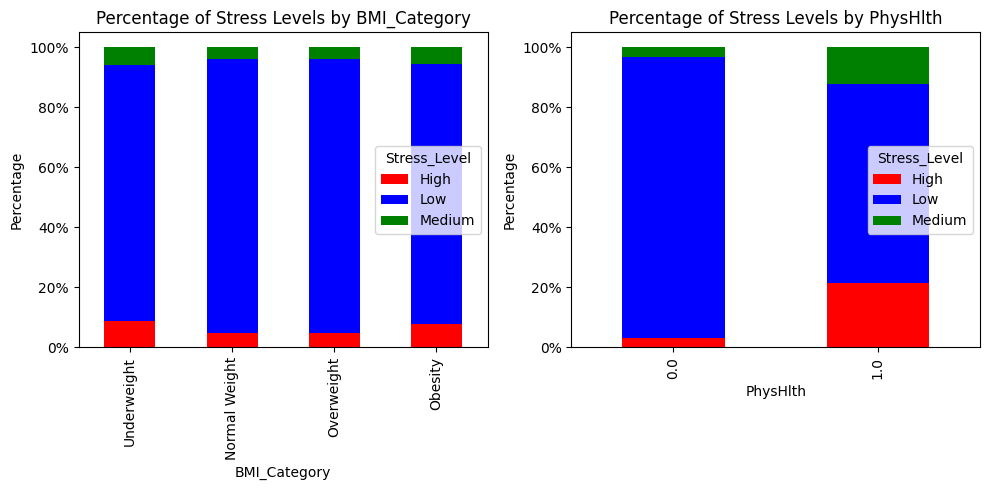

In [ ]:
cat_cols = ['BMI_Category', 'PhysHlth']
num_cols = ['MentHlth']

stress_level_colors = {'Low': 'blue',
                       'Medium': 'green',
                       'High': 'red'}

# Set the number of rows and columns for subplots
num_rows = 1
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

# Loop through each categorical column in cat_cols
for i, cat_col in enumerate(cat_cols):
    # Group by the categorical column and count the values in 'Stress_Level' column
    counts = ddiab_t1t2_df_cleaned.groupby(cat_col)['Stress_Level'].value_counts().unstack(fill_value=0)

    # Calculate the percentage for each stress level
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    # Plot the percentage bar plot with designated colors for each stress level
    percentages.plot(kind='bar', stacked=True, ax=axes[i], color=[stress_level_colors.get(x, 'blue') for x in percentages.columns])

    # Set plot title and labels
    axes[i].set_title(f'Percentage of Stress Levels by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Percentage')

    # Format y-axis as percentage
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

**ANALYSIS** - There is a higher proportion of individuals with high stress levels among those who are underweight or obese compared to those who have normal weight or are overweight.

There is also a much higher proportion of individuals who have medium and high stress levels for those with bad physical health for over 15 days within the last 30 days, indicating that physical health is vital for mental health.

### 3.3.2 Correlation of pre-existing health conditions with mental health

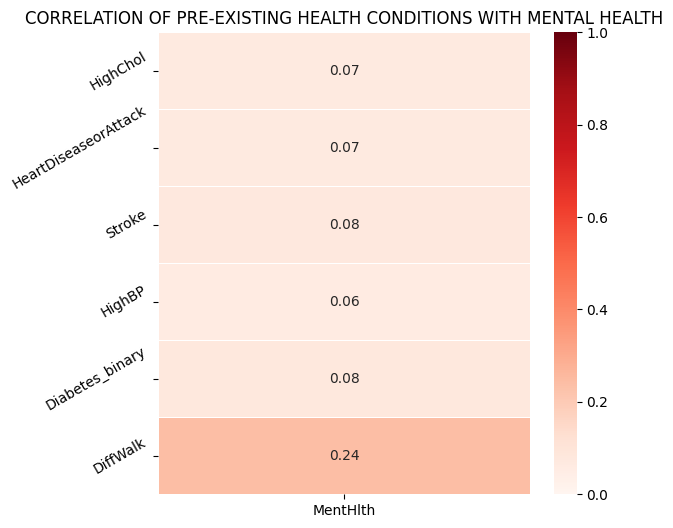

In [ ]:
health_columns = ['MentHlth', 'HighChol', 'HeartDiseaseorAttack', 'Stroke', 'HighBP', 'Diabetes_binary', 'DiffWalk']
dhealth_filtered = ddiab_t1t2_df[health_columns].copy()

# Compute the correlation matrix
correlation_matrix = dhealth_filtered.corr()

# Isolating the correlation of all variables with 'MentHlth'
correlation_with_menthlth = correlation_matrix[['MentHlth']].drop(['MentHlth'])

# Generate a heatmap with a nicer color palette and adjusted scale
plt.figure(figsize=(6, 6))  # Adjust the size to fit the number of variables
sns.heatmap(correlation_with_menthlth, annot=True, cmap='Reds', fmt=".2f", linewidths=.5, cbar=True,
            vmin=0, vmax=1)  # Adjust the colormap scale from 0 to 1
plt.title('CORRELATION OF PRE-EXISTING HEALTH CONDITIONS WITH MENTAL HEALTH')
plt.yticks(rotation=30, fontsize=10)
plt.show()

**ANALYSIS** - The graph indicates a low to moderate positive correlation between various pre-existing health conditions and mental health, with difficulty walking (DiffWalk) showing the strongest relationship with mental health issues (correlation of 0.24), while the rest have a weak, positive relationship.


## 3.4 How does stress level vary based on employee location and occupation?

### 3.4.1 Stress level across different occupations and employment type

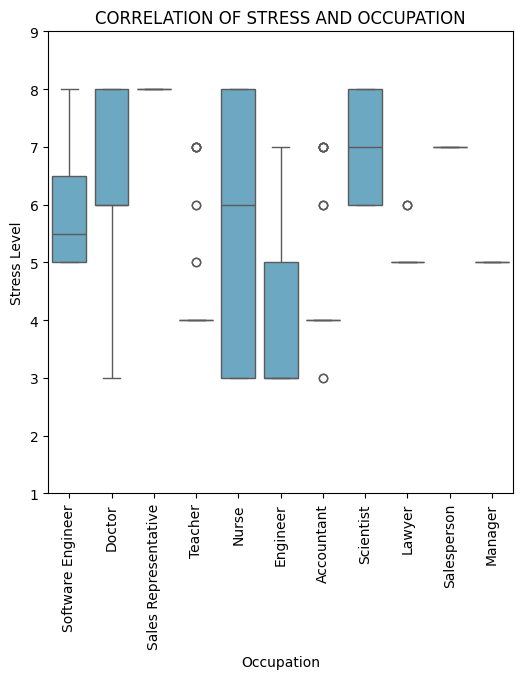

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=dsleep_cleaned, y="Stress Level", x="Occupation", color="#5FADD0")
plt.title("CORRELATION OF STRESS AND OCCUPATION")
plt.xlabel("Occupation")
plt.ylabel("Stress Level")
plt.xticks(rotation=90)
plt.ylim(1, 9)
plt.show()

In [ ]:
# Checking records for each occupation
print(dsleep_cleaned['Occupation'].value_counts())

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64


**ANALYSIS** - The box plot indicates variability in stress levels across different occupations, with sales representatives, nurses, and doctors showing the highest median stress levels. Outliers are present in several professions, suggesting that there are individuals with stress levels significantly different from the group's median.

For occupations such as "Software Engineer," "Scientist," "Sales Representative," and "Manager," the stress levels may not be as accurate because of the low records of these occupations within the dataset.

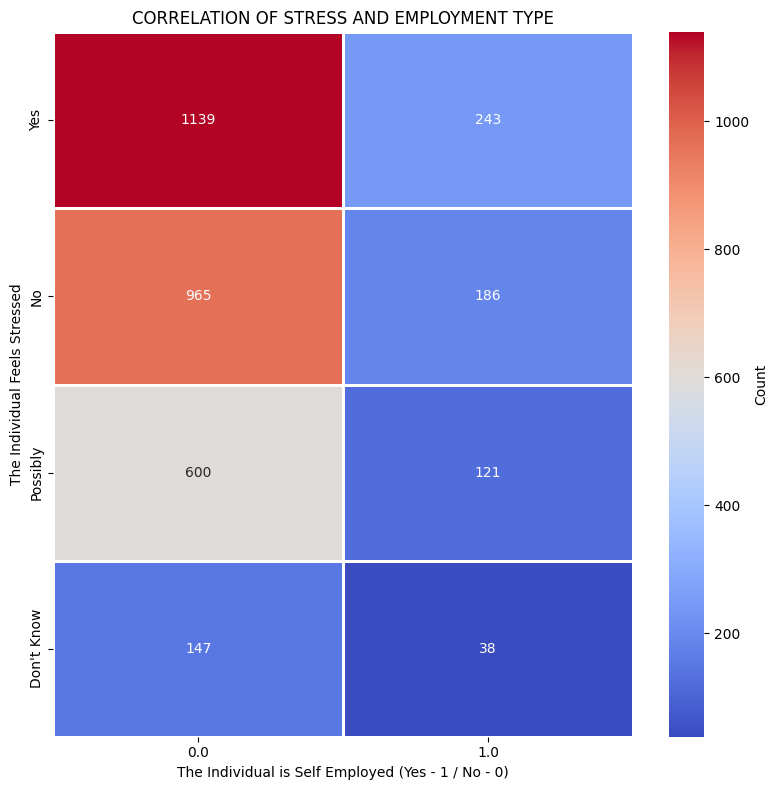

In [ ]:
plt.figure(figsize=(8, 8))
df_heat = pd.DataFrame({
    x_label: grp['Mental Health Disorder?'].value_counts()
    for x_label, grp in df1.groupby('Self-employed?')
})
sns.heatmap(df_heat, cmap='coolwarm', annot=True, fmt='d', linewidths=2, cbar_kws={'label': 'Count'})
plt.xlabel('The Individual is Self Employed (Yes - 1 / No - 0)')
plt.ylabel('The Individual Feels Stressed')
plt.title('CORRELATION OF STRESS AND EMPLOYMENT TYPE')
plt.tight_layout()
plt.show()

**ANALYSIS** - The heatmap illustrates a comparison of reported stress levels with employment type, showing a higher count of stressed individuals who are not self-employed (1,139) compared to self-employed individuals (243). Those who do not report being stressed are also predominantly not self-employed (965), suggesting that in this sample, employees working for others may experience higher stress levels than those who are self-employed.








### 3.4.2 Relationship between stress and location

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN STRESS AND LOCATION')

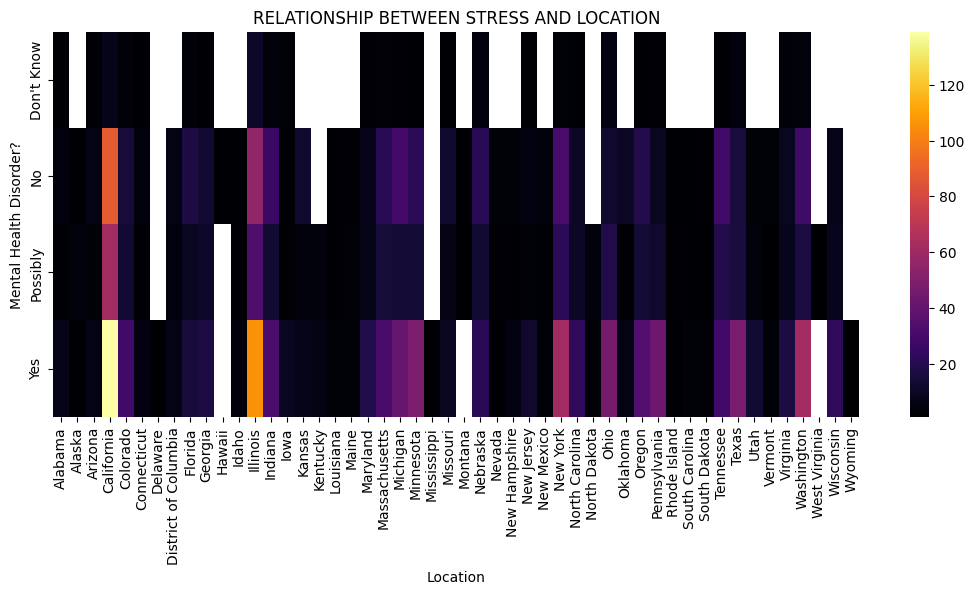

In [ ]:
plt.subplots(figsize=(13, 5))
mh_loc = pd.DataFrame({
    x_label: grp['Mental Health Disorder?'].value_counts()
    for x_label, grp in df1.groupby('US state or territory')
})
sns.heatmap(mh_loc, cmap='inferno')
plt.xlabel('Location')
_ = plt.ylabel('Mental Health Disorder?')
plt.title('RELATIONSHIP BETWEEN STRESS AND LOCATION')

**ANALYSIS** - The number of people with mental health disorders varies among different states but is higher in the states of California and Illinois.

##**3.5 Interactive Looker Dashboard Visualizations**

We embedded our Looker Dashboard Visualizations into Collab in this section.
Please find the *screenshots* in the the **Appendix** in case the interactive visuals do not work due to compatibility issues or any other errors.

In [ ]:
from IPython.display import IFrame

embed_url = 'https://lookerstudio.google.com/embed/reporting/35ff97ef-b90f-4cd0-9674-3fba80a0edbe/page/98hxD'

# Set the width and height for the iframe as needed
IFrame(embed_url, width=1300, height=1000)

# **4. Machine Learning Model**
The following ML model analyzes whether a person undergoing the conditions above would be stressed while working:

## 4.1 Data Preperation

We used the “[CDC Diabetes Health Indicators](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)”  from the UC Irvine Machine Learning Repository to build our predictive model as it has the highest number of records of employees and variables that affect mental health.

In [ ]:
prediction_df = ddiab_t1t2_df_cleaned.copy()
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324372 entries, 0 to 70691
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_binary       324372 non-null  float64 
 1   HighBP                324372 non-null  float64 
 2   HighChol              324372 non-null  float64 
 3   CholCheck             324372 non-null  float64 
 4   BMI                   324372 non-null  float64 
 5   Smoker                324372 non-null  float64 
 6   Stroke                324372 non-null  float64 
 7   HeartDiseaseorAttack  324372 non-null  float64 
 8   PhysActivity          324372 non-null  float64 
 9   Fruits                324372 non-null  float64 
 10  Veggies               324372 non-null  float64 
 11  HvyAlcoholConsump     324372 non-null  float64 
 12  AnyHealthcare         324372 non-null  float64 
 13  NoDocbcCost           324372 non-null  float64 
 14  GenHlth               324372 non-null  flo

In [ ]:
prediction_df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income,Stress_Level,Stress_Level_2,BMI_Category
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,18.0,1.0,1.0,Female,9.0,4.0,3.0,Medium,High,Obesity
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,Female,7.0,6.0,1.0,Low,Low,Overweight
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,30.0,1.0,1.0,Female,9.0,4.0,8.0,High,High,Overweight
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,Female,11.0,3.0,6.0,Low,Low,Overweight
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,3.0,0.0,0.0,Female,11.0,5.0,4.0,Low,Low,Normal Weight


In [ ]:
cat_cols2 = []
num_cols2 = []

# Loop through columns and categorize based on data type
for col in prediction_df.columns:
    if prediction_df[col].dtype == 'object' or prediction_df[col].dtype == 'category':  # Categorical columns have 'object' dtype
        cat_cols2.append(col)
    else:
        num_cols2.append(col)

In [ ]:
cat_cols2

['Gender', 'Stress_Level', 'Stress_Level_2', 'BMI_Category']

In [ ]:
num_cols2

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Age',
 'Education',
 'Income']

* *'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk'*: These are not numerical variables but categorical ones with binary values. (Yes/No)

* We dropped *'BMI'* and *'MentHlth'* because *'BMI_Category', 'Stress_Level'*, and '*Stress_Level_2'* already exist

In [ ]:
prediction_df.drop(columns = ['BMI', 'MentHlth'], inplace=True)
prediction_df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Gender', 'Age', 'Education', 'Income',
       'Stress_Level', 'Stress_Level_2', 'BMI_Category'],
      dtype='object')

## 4.2 Logistic Regression Model - Three Class Models *(Stress level: Low, Medium, High)*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

In [ ]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324372 entries, 0 to 70691
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_binary       324372 non-null  float64 
 1   HighBP                324372 non-null  float64 
 2   HighChol              324372 non-null  float64 
 3   CholCheck             324372 non-null  float64 
 4   Smoker                324372 non-null  float64 
 5   Stroke                324372 non-null  float64 
 6   HeartDiseaseorAttack  324372 non-null  float64 
 7   PhysActivity          324372 non-null  float64 
 8   Fruits                324372 non-null  float64 
 9   Veggies               324372 non-null  float64 
 10  HvyAlcoholConsump     324372 non-null  float64 
 11  AnyHealthcare         324372 non-null  float64 
 12  NoDocbcCost           324372 non-null  float64 
 13  GenHlth               324372 non-null  float64 
 14  PhysHlth              324372 non-null  flo

In [ ]:
prediction_df[['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Gender', 'Education', 'Income']] = prediction_df[['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk','Gender', 'Education', 'Income']].astype('category')

In [ ]:
# Independent variables (features)
X = prediction_df.drop(['Stress_Level', 'Stress_Level_2'], axis=1)  # Drop the dependent variable column

# Dependent variable (target)
y = prediction_df['Stress_Level']

In [ ]:
# Perform one-hot encoding on categorical variables in X
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid multicollinearity

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (259497, 36)
X_test shape: (64875, 36)
y_train shape: (259497,)
y_test shape: (64875,)


In [ ]:
# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence

# Train the model on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict the target variable on the test data
y_pred = log_reg.predict(X_test)

In [ ]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model:", accuracy)

Accuracy of Logistic Regression Model: 0.8982504816955684


In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[  451  3365     0]
 [  364 57823     0]
 [  161  2711     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

        High       0.46      0.12      0.19      3816
         Low       0.90      0.99      0.95     58187
      Medium       0.00      0.00      0.00      2872

    accuracy                           0.90     64875
   macro avg       0.46      0.37      0.38     64875
weighted avg       0.84      0.90      0.86     64875



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**ANALYSIS** - Overall, the model performs well in predicting the 'Low' stress level but struggles with the 'High' and 'Medium' stress levels, as indicated by the low precision, recall, and F1-score for these classes. There might be an imbalance in the dataset, or the features might not sufficiently capture the variability in these classes, leading to the model's poor performance.

##4.3 Model Improvement - Binary Classification *(Stress: Yes/No)*

To improve the logistic regression model, we implemented binary classification for stress levels, whereby mental health days > 15 are considered **"High Stress"** and mental health days <= 15 are considered **"Low Stress"**.

In [ ]:
# Independent variables (features)
X = prediction_df.drop(['Stress_Level', 'Stress_Level_2'], axis=1)  # Drop the dependent variable column

# Dependent variable (target)
y = prediction_df['Stress_Level_2']

In [ ]:
# Perform one-hot encoding on categorical variables in X
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid multicollinearity

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (259497, 36)
X_test shape: (64875, 36)
y_train shape: (259497,)
y_test shape: (64875,)


In [ ]:
# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence

# Train the model on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict the target variable on the test data
y_pred = log_reg.predict(X_test)

In [ ]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model:", accuracy)

Accuracy of Logistic Regression Model: 0.9265356454720617


In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[  485  4375]
 [  391 59624]]

Classification Report:
              precision    recall  f1-score   support

        High       0.55      0.10      0.17      4860
         Low       0.93      0.99      0.96     60015

    accuracy                           0.93     64875
   macro avg       0.74      0.55      0.57     64875
weighted avg       0.90      0.93      0.90     64875



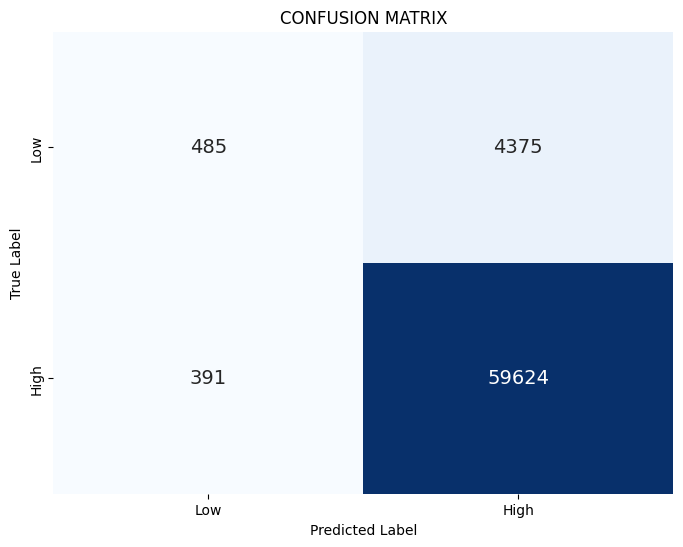

In [ ]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14}, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CONFUSION MATRIX')
plt.xticks(ticks=[0.5, 1.5], labels=['Low', 'High'])
plt.yticks(ticks=[0.5, 1.5], labels=['Low', 'High'])
plt.show()

In summary, the imbalance in the dataset is evident from the disparities in the number of instances between the classes and the differences in performance metrics for each class. It's important to address class imbalance to prevent biased model predictions and to ensure fair and accurate model performance evaluation. Techniques such as oversampling, undersampling, or using appropriate evaluation metrics can be employed to handle imbalanced datasets.

*   *Support:* The 'support' column shows the number of actual occurrences of each class in the test set. There are 4,860 instances of 'High' stress level and 60,015 instances of 'Low' stress level. The 'Low' stress level class has significantly more instances compared to the 'High' stress level class.
*   *Precision and Recall: *For the minority class ('High' stress level), the precision (0.55) and recall (0.10) are relatively low compared to the majority class ('Low' stress level), which has high precision (0.93) and recall (0.99). This indicates that the model's ability to correctly identify instances of the 'High' stress level is lower compared to the 'Low' stress level.
*   *F1-score:* The F1-score for the minority class ('High' stress level) is also lower (0.17) compared to the majority class ('Low' stress level) (0.96), indicating poorer overall performance for the minority class.
*  *Macro and Weighted Averages:* The macro-average F1-score (0.57) and macro-average precision and recall indicate an overall imbalance in the performance metrics across the classes.

## 4.4 Model Improvement - *Using SMOTE on Binary Classification*

Since the model had low F1-score (0.17) due to inbalanced data-set, we drew the **Synthetic Minority Oversampling Technique (SMOTE)**, which is a  machine learning technique that creates new examples of minority class samples to balance out imbalanced datasets.



In [ ]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model on the resampled training data
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict the target variable on the test data
y_pred = log_reg.predict(X_test)

In [ ]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model:", accuracy)

Accuracy of Logistic Regression Model: 0.8167398843930636


In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 2811  2049]
 [ 9840 50175]]

Classification Report:
              precision    recall  f1-score   support

        High       0.22      0.58      0.32      4860
         Low       0.96      0.84      0.89     60015

    accuracy                           0.82     64875
   macro avg       0.59      0.71      0.61     64875
weighted avg       0.91      0.82      0.85     64875



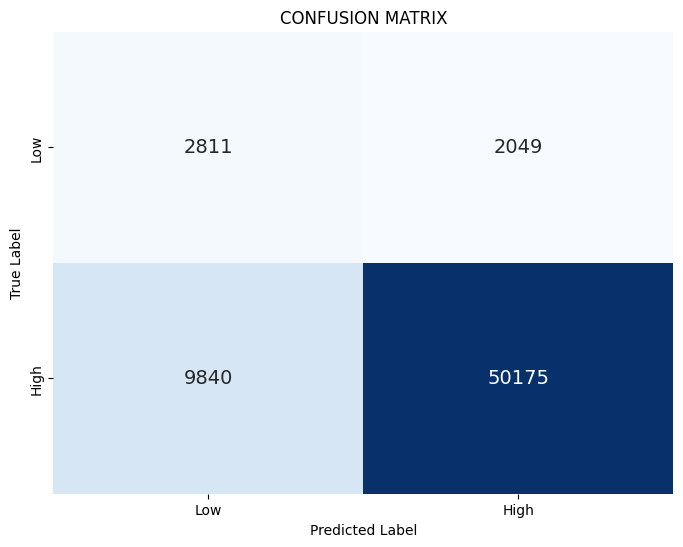

In [ ]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14}, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CONFUSION MATRIX')
plt.xticks(ticks=[0.5, 1.5], labels=['Low', 'High'])
plt.yticks(ticks=[0.5, 1.5], labels=['Low', 'High'])
plt.show()

1. **Confusion Matrix:**
   - True Positives (TP) for the 'High' stress level class have increased from 485 to 2,811, and False Positives (FP) for the 'High' stress level class have decreased from 4,375 to 2,049.
   - True Negatives (TN) and False Negatives (FN) for the 'Low' stress level class have also changed accordingly.

2. **Classification Report:**
   - Precision for the 'High' stress level class has increased from 0.55 to 0.22, indicating a higher proportion of correctly predicted 'High' instances among all instances predicted as 'High'.
   - Recall for the 'High' stress level class has increased from 0.10 to 0.58, indicating a higher proportion of correctly predicted 'High' instances among all actual 'High' instances.
   - F1-score for the 'High' stress level class has increased from 0.17 to 0.32, which is the harmonic mean of precision and recall and provides a balanced measure of model performance.
   - Accuracy has decreased slightly from 0.93 to 0.82 due to the more balanced class distribution and the focus on improving the minority class performance.

3. **Interpretation**:
   - The SMOTE technique has effectively balanced the class distribution in the dataset, resulting in improved performance metrics for the minority class ('High' stress level).
   - The model now better identifies instances of the 'High' stress level, as reflected in the increased precision, recall, and F1-score for this class.
   - However, there is a trade-off, as the accuracy has slightly decreased due to the model's focus on correctly predicting the minority class, which may lead to more false positives for the majority class ('Low' stress level).
   - Overall, the model's performance has improved in terms of correctly identifying instances of the minority class while maintaining a reasonable level of accuracy.

## 4.5 Understanding Key Indicators that Lead to Stress

To determine the key indicators that lead to stress, we have retrieved the coefficients and intercept of the logistic regression model used in part 4.4. Coefficients with higher positive or negative values indicate that the factor plays a larger role in employee stress.

In [ ]:
# Get the coefficients and intercept of the logistic regression model
coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_

# Create a DataFrame to store coefficients and corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Calculate the absolute value of coefficients for sorting
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])

# Sort the DataFrame by absolute coefficient values
coefficients_df_sorted = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

coefficients_df_sorted

,Feature,Coefficient,Abs_Coefficient
24,Education_5.0,-5.512865,5.512865
23,Education_4.0,-5.475770,5.475770
25,Education_6.0,-5.450544,5.450544
21,Education_2.0,-5.407105,5.407105
22,Education_3.0,-5.405476,5.405476
33,BMI_Category_Normal Weight,-3.065464,3.065464
35,BMI_Category_Obesity,-2.970672,2.970672
18,GenHlth_5.0,-2.965349,2.965349
34,BMI_Category_Overweight,-2.959270,2.959270
17,GenHlth_4.0,-2.385379,2.385379


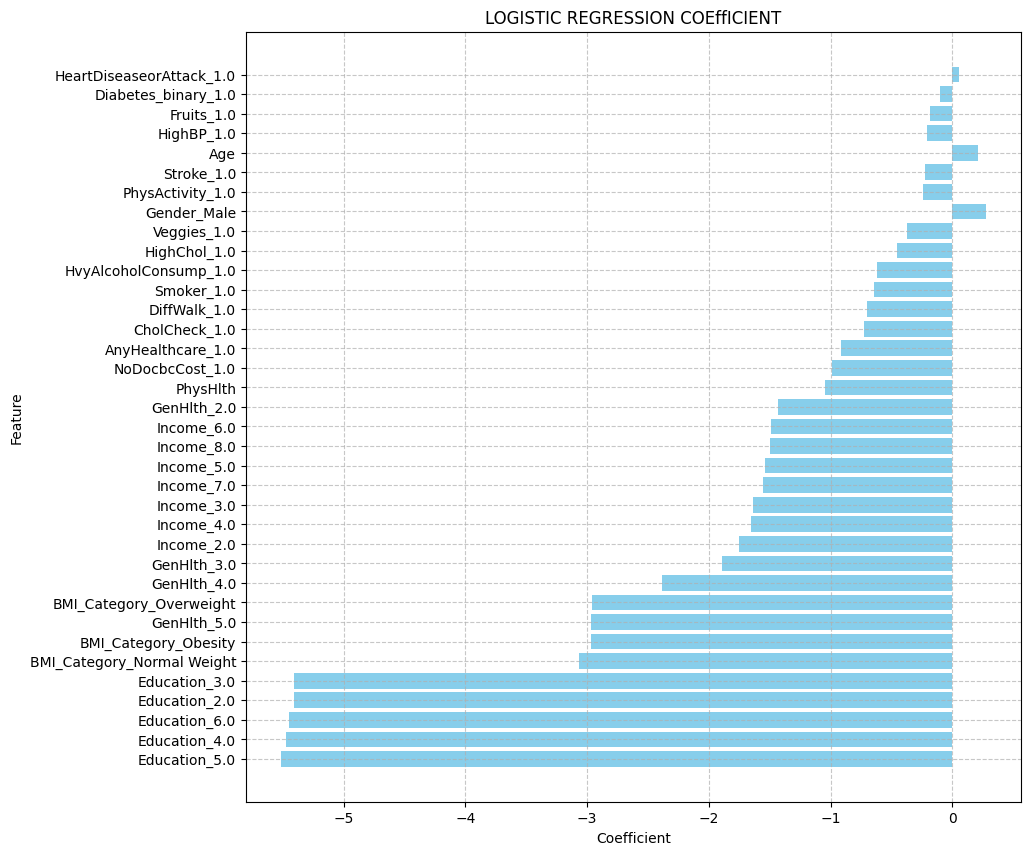

In [ ]:
# Plot the sorted coefficients
plt.figure(figsize=(10, 10))
plt.barh(coefficients_df_sorted['Feature'], coefficients_df_sorted['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('LOGISTIC REGRESSION COEffICIENT')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**ANALYSIS** - Through the logistic regression coefficients, we have found that the model has shown **Education**, **Income**, and **General Health** as the largest negative coefficients for stress, indicating that these features are most associated with lower odds of employee stress.



#**5. Challenges**

1. **Exploratory Data Analysis:** In this project, we used datasets from different sources. For instance, we utilized a diabetes dataset focused on factors that cause diabetes (including mental health) and a sleep dataset focused on factors affecting sleep health (including stress). While mental health status, disorders, and stress can be correlated, their relationship is very complex. Hence, we were unable to merge different datasets for a consolidated exploratory data analysis or a machine learning model.Although we attempted to find the correlation of stress with various factors such as demographics or health conditions, results may vary based on the datasets we used. Furthermore, insights correlating different graphs may not be fully accurate due to differences in sample numbers and demographics distribution in the sample.

1. **Use of Diabetes dataset for machine learning model:** We chose the Diabetes dataset to create a machine learning model on whether employees are stressed because it had the highest sample number and variables affecting mental health. However, the Diabetes dataset did not necessarily include all the main variables that affect mental health/stress, and the data were imbalanced as most people had low stress levels. Furthermore, the dataset was a survey with all categorical variables, making it challenging to calculate coefficients or correlations with the target vector. A better dataset could improve the model's F-1 score without compromising accuracy.

#**6. Conclusion**

In this project, we attempted to use Python and a variety of libraries such as pandas, seaborn, scikit-learn, and imbalanced-learn to explore various datasets consisting of employee mental health status and stress levels and build a predictive model for employee burnout.

Our visualizations revealed that stress is most prevalent among younger individuals (aged 20-29), possibly due to work pressure in entry and mid-level positions. Stress is also influenced by lifestyle, diet, and sleep. Consuming nutritious food, avoiding alcohol and smoking, maintaining proper sleep hours, and having better sleep quality are associated with lower stress. Conversely, having a BMI that is too low or too high and pre-existing health conditions, such as difficulty walking, could lead to higher stress. Overall, there is variability in stress levels across different occupations and locations, but employees working for others may experience higher stress levels than those who are self-employed. Higher annual income is associated with lower stress.

We also created a predictive model for employee burnout using the CDC Diabetes Health Indicators Dataset as it included the most variables that affect employee stress. Our logistic regression model performs better in determining stress when we use binary classification for employee stress based on having more than 15 days of mental health days within 30 days, achieving an accuracy of approximately 92.7%. However, this dataset is imbalanced as it mainly consists of individuals with lower stress levels. We attempted to use the SMOTE technique to improve the logistic regression model's F-1 score from 0.17 to 0.32, but this decreased accuracy to around 81.7%. Having a dataset that primarily addresses mental health and has a balanced distribution of employees with different stress levels could improve our F-1 score without compromising our logistic regression model's accuracy.

Nevertheless, the insights gained from this project could be valuable for businesses in managing employee stress, whether through supporting employees in improving their lifestyle, providing additional education, or offering benefits related to physical health. This could lead to higher productivity within the organization.

# **CITATIONS**

* The [“Mental Health in Tech Survey”](https://osmihelp.org/research.html) datasets for 10 years by OSMI
* The [“CDC Diabetes Health Indicators”](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators) from the UC Irvine Machine Learning Repository.
* The [“Sleep Health and Lifestyle Dataset”](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset) from Kaggle
*  The Zion Market Research for [“Online Therapy Services Market Size, Share and Value 2032”](https://www.zionmarketresearch.com/report/online-therapy-services-market)

***Please Note -*** *Team 2 utilized a combination of Google, ChatGPT, and the class slides to create these charts. While we brainstormed and determined what needed to be shown independently, meeting the syntactical requirements would have been time-consuming without leveraging ChatGPT. However, in many cases, ChatGPT did not provide the correct solution, necessitating manual adjustments from our end to ensure functionality.*

# APPENDIX - Dashboard Screenshots *(Alternative to Section 3.5)*

Please find the screenshots of our Looker Dashboard Visualizations below. We embedded our dashboard in **Section 3.5** and decided to add the screenshots in case the interactive visuals do not work due to compatibility issues or any other errors.



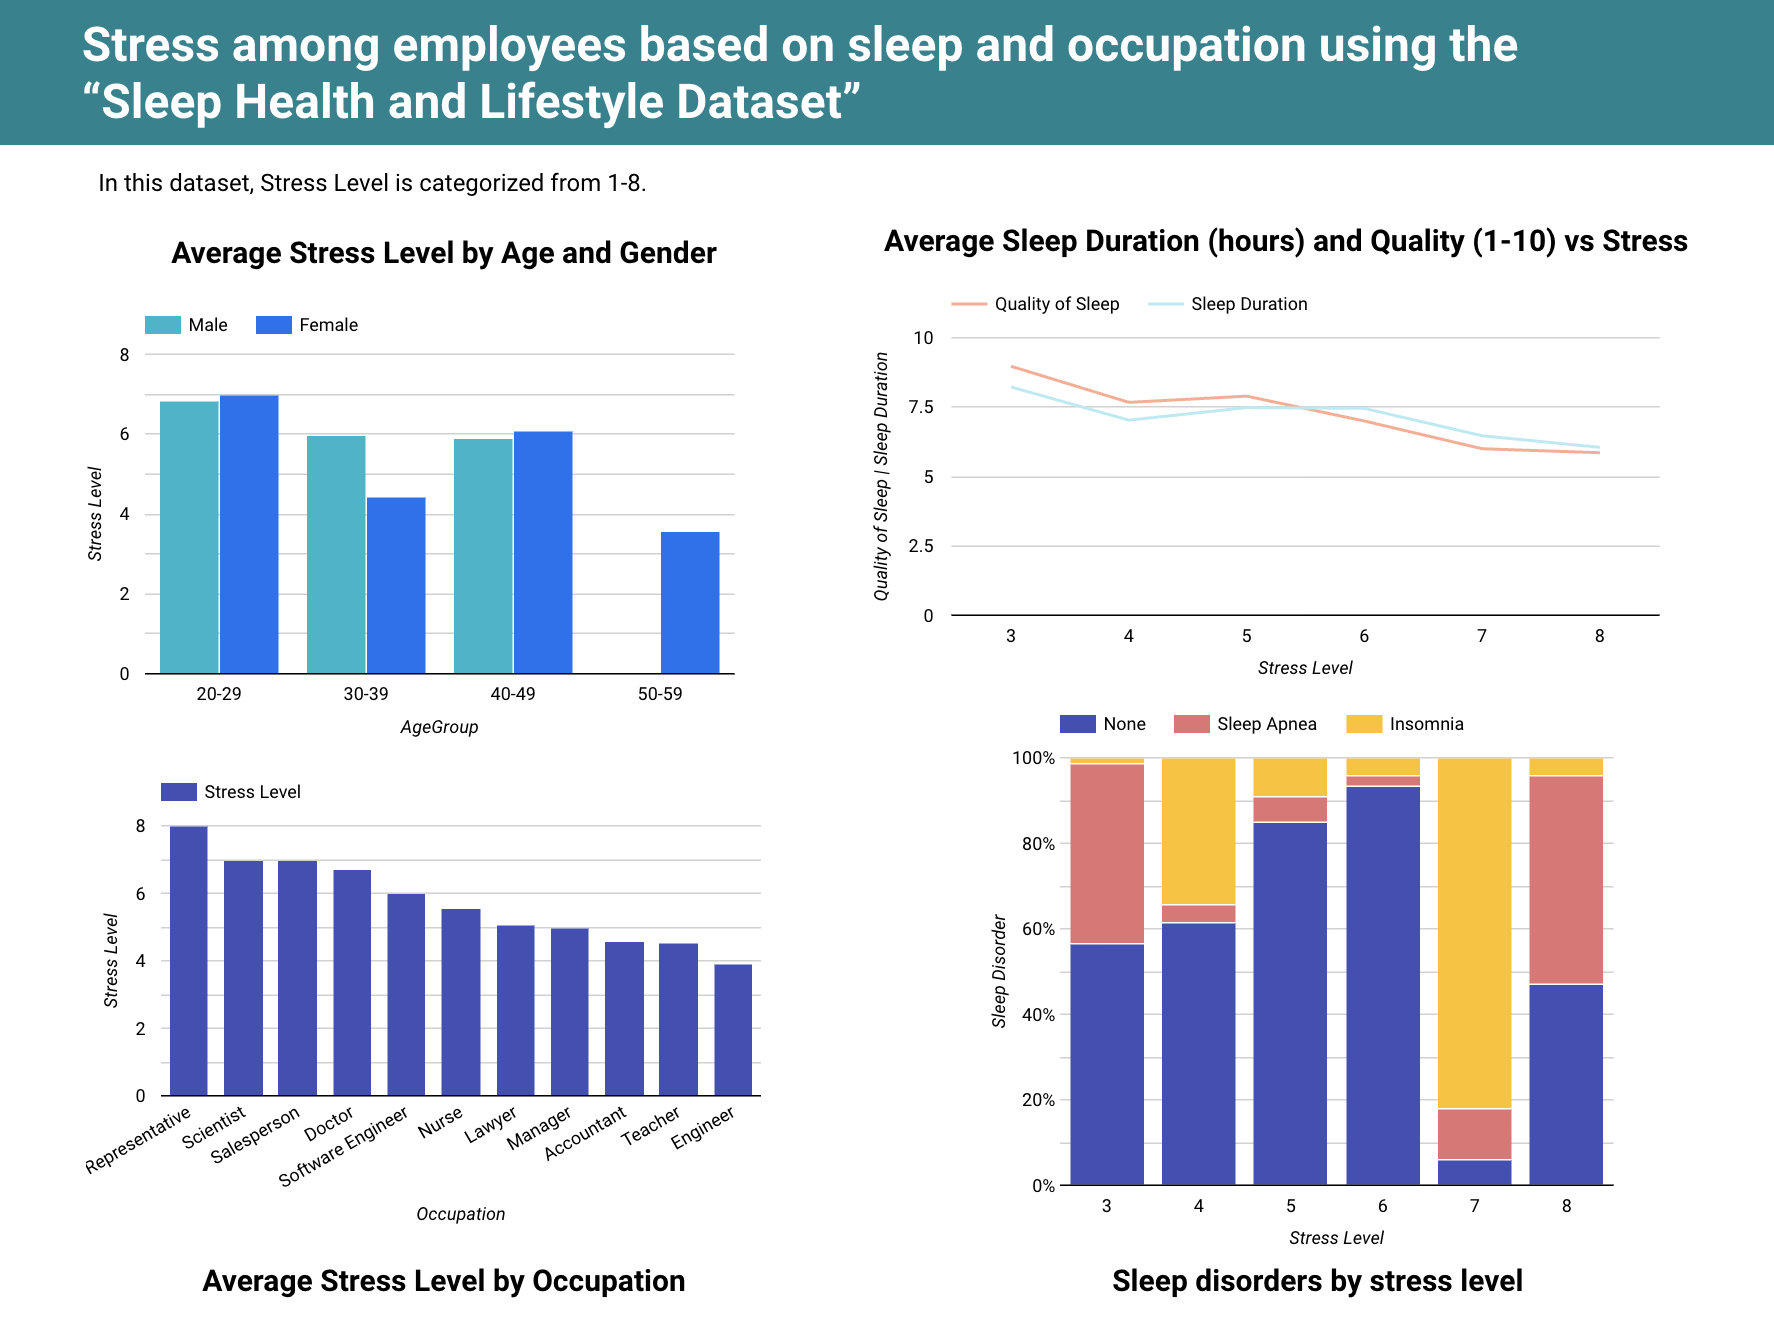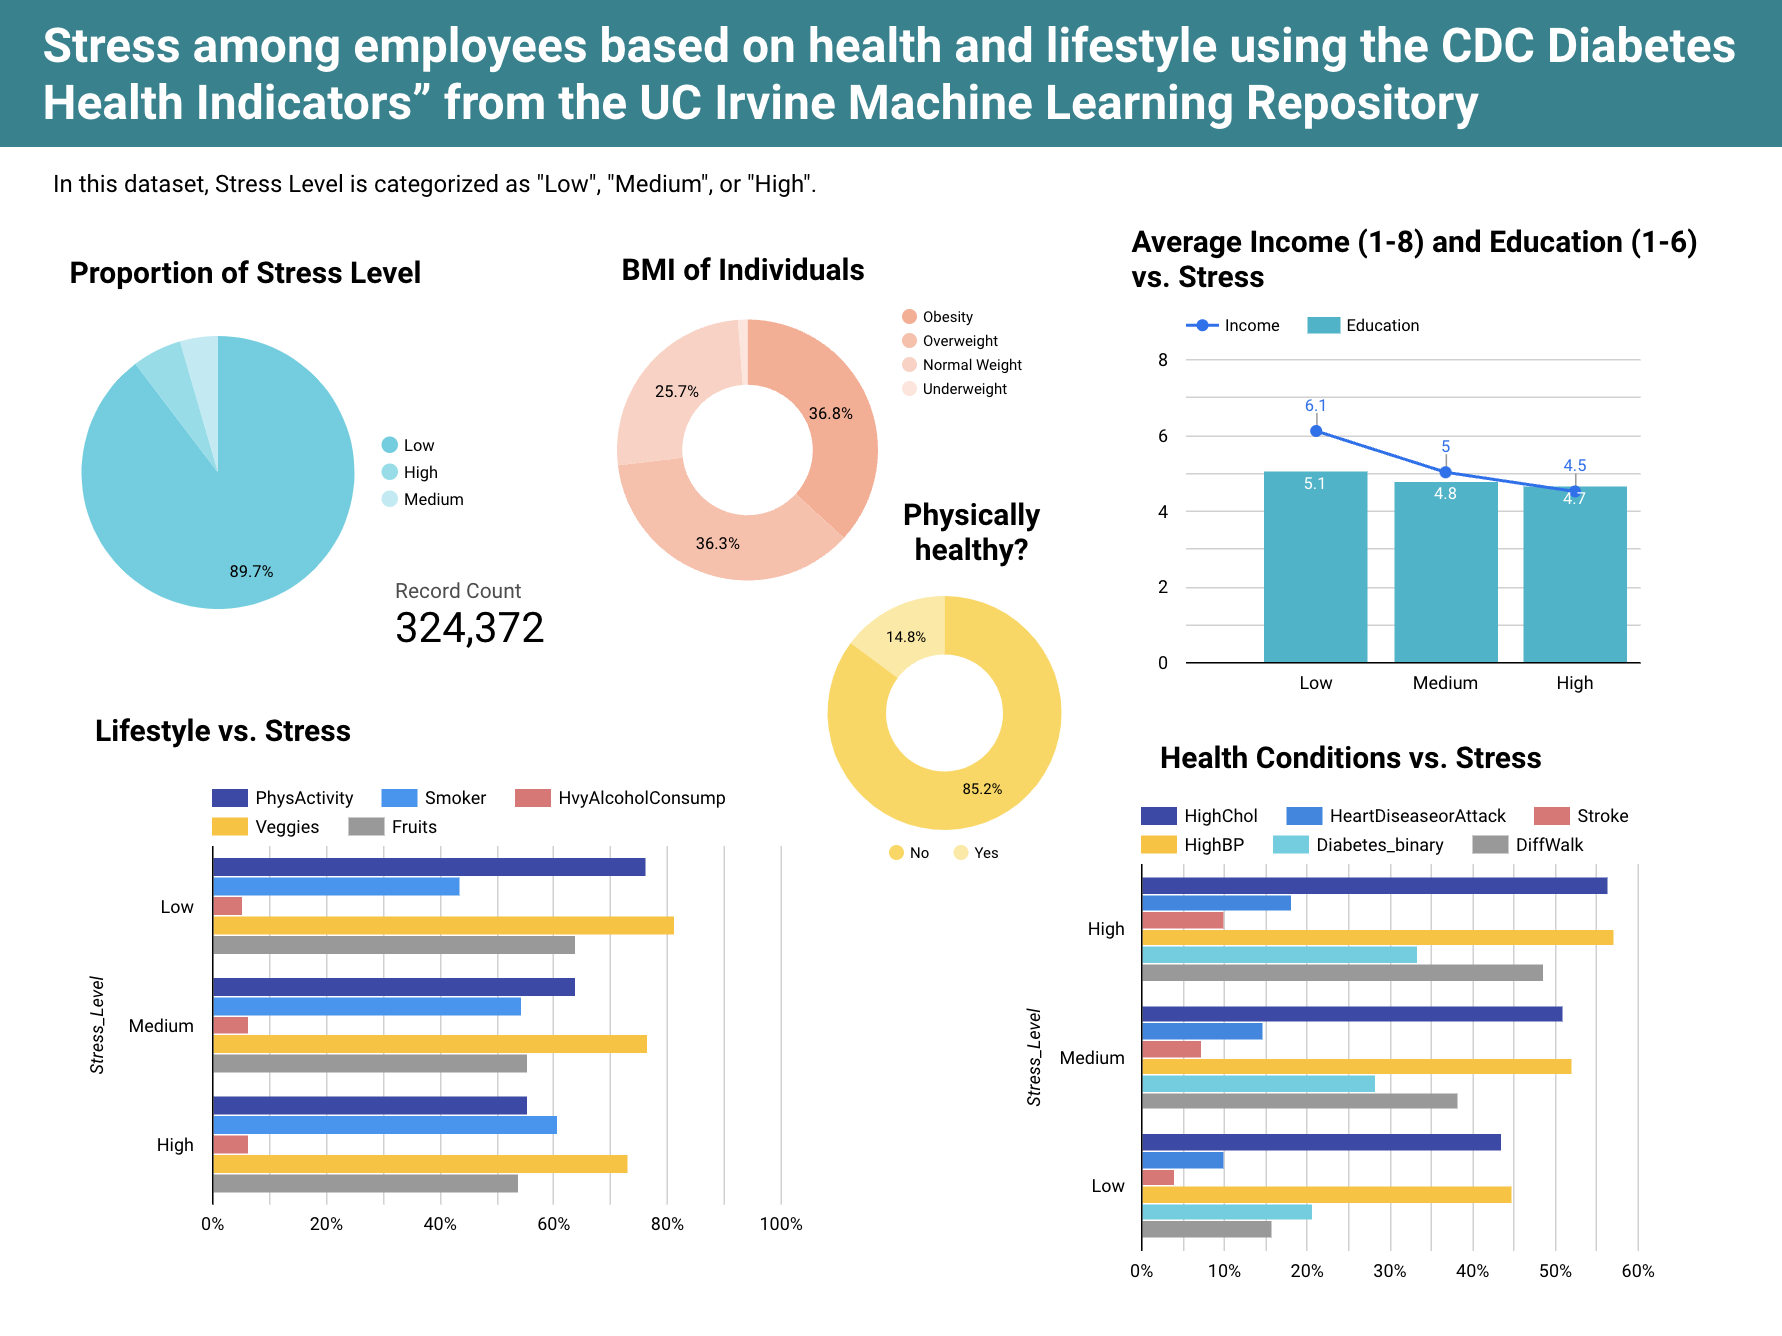